In [81]:
import elfi
import seaborn as sns
from operator import itemgetter
import numpy as np
import json
import pandas as pd

In [212]:
# if [petal_width] < 0.5 then species = 'setosa'
# if [sepal_length] > 6. then species = 'virginica'
# if [petal_width] > 1. and [petal_width]< 2. then species = 'versicolor'

def rule0(probability_threshold, probability, row):
    print('--------------------------------')
    print(probability_threshold)
    print(probability)
    print(row)
#     print("%s > %s : %s " % (probability_threshold,probability,probability < probability_threshold))
    print('--------------------------------')
    if probability < probability_threshold:
        if 
        row[4]='setosa'
    return row

def rule1(probability_threshold, probability, row):
    if probability < probability_threshold and row[0] > 6:
        row[4]='virginica'
    return row  
        
def rule2(probability_threshold, probability, row):
    if probability < probability_threshold and row[3] > 1 and row[3] < 2:
        row[4]='versicolor'
    return row

In [213]:
rule0 = np.vectorize(rule0)
rule1 = np.vectorize(rule1)
rule2 = np.vectorize(rule2)
# rules = [np.vectorize(rule0), np.vectorize(rule1), np.vectorize(rule2)]

In [214]:
import scipy.stats as ss
import numpy as np

iris_df = sns.load_dataset('iris')
y0 = np.asarray(list(iris_df['species']), dtype=object)
distinct_values = iris_df['species'].unique()
iris_df['species'] = None

iris_mtx_simple_array = iris_df.as_matrix()
iris_mtx = np.ndarray((len(iris_mtx_simple_array),), dtype=object)
for row in range(len(iris_mtx_simple_array)):
    iris_mtx[row] = iris_mtx_simple_array[row]
    
batch_size = len(iris_mtx)

def simulator(probability_rule1, probability_rule2, probability_rule3, iris_mtx, batch_size=batch_size, random_state=None):
    probability_rule1, probability_rule2, probability_rule3 = np.atleast_1d(probability_rule1, probability_rule2, probability_rule3)
    probability_rule1 = probability_rule1[:, None]
    probability_rule2 = probability_rule2[:, None]
    probability_rule3 = probability_rule3[:, None]
    probability_thresholds = np.asarray([el[0] for el in probability_rule1])
    for timestep in range(1):
        random_numbers = np.random.random((3,batch_size))    
        iris_mtx = rule0(probability_thresholds, random_numbers[0], iris_mtx)
#         iris_mtx = rule1(probability_rule2, random_numbers[1], iris_mtx)
#         iris_mtx = rule2(probability_rule3, random_numbers[2], iris_mtx)
    
    print('probabilities-------------------------------------')
    probability_df = pd.DataFrame({'probability_threshold':[el[0] for el in probability_rule1],
                                   'probability':random_numbers[0], 
                                   'row3':list(map(itemgetter(3), iris_mtx)),
                                   'species': list(map(itemgetter(4), iris_mtx))}, index=range(len(probability_rule1)))
    with open('probability_df.csv', 'a') as f:
        probability_df.to_csv(f, header=False, index=False)

    return list(map(itemgetter(4), iris_mtx))


def categorical_distance(u, v):
    u = np.asarray(u, dtype=object, order='c').squeeze()
    u = np.atleast_1d(u)
    v = np.asarray(v, dtype=object, order='c').squeeze()
    v = np.atleast_1d(v)
    u_v = np.equal(u, v).astype(int)
    print('distances -----------------------------------------')
    distances_df = pd.DataFrame({'distances':u_v}, index=range(len(u_v)))
    with open('distances_df.csv', 'a') as f:
        distances_df.to_csv(f, header=False, index=False)

    print(len(u_v))

#     dist = np.sum(u_v, axis=1)
    return u_v


def unchanged(y):
    return y


# to_int_mapping_dict = {value: value_number for value_number,value in enumerate(distinct_values)}
# def map_to_int(y, mapping_dict):
#     if isinstance(y[0], list):
#         return np.asarray([mapping_dict[value] if value is not None else None for value in y[0]], dtype=object)
#     else:
#         return np.asarray([mapping_dict[value] if value is not None else None for value in y], dtype=object)



 c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:Method .as_matrix will be removed in a future version. Use .values instead.


In [215]:
my_model = elfi.ElfiModel() 
    
probability_rule1 = elfi.Prior('uniform', 0, 1, model=my_model)
probability_rule2 = elfi.Prior('uniform', 0, 1, model=my_model)
probability_rule3 = elfi.Prior('uniform', 0, 1, model=my_model)    

# Add the simulator node and observed data to the model
Y = elfi.Simulator(simulator, probability_rule1, probability_rule2, probability_rule3, iris_mtx,observed=y0, model=my_model)

# Add summary statistics to the model
# S1 = elfi.Summary(map_to_int, Y, to_int_mapping_dict, model=my_model)
S1 = elfi.Summary(unchanged, Y, model=my_model)

# Specify distance as euclidean between summary vectors (S1, S2) from simulated and
# observed data
d = elfi.Distance(categorical_distance, S1, model=my_model)

In [216]:
rej = elfi.Rejection(d, batch_size=batch_size, seed=30052017)
res = rej.sample(10000, threshold=.5)
print(res)

--------------------------------
0.06752469796174576
0.2916790579257784
[5.1 3.5 1.4 0.2 None]
--------------------------------
--------------------------------
0.06752469796174576
0.2916790579257784
[5.1 3.5 1.4 0.2 None]
--------------------------------
--------------------------------
0.046528920540249374
0.9689666752899324
[4.9 3.0 1.4 0.2 None]
--------------------------------
--------------------------------
0.4361634861451943
0.3959652688015468
[4.7 3.2 1.3 0.2 None]
--------------------------------
--------------------------------
0.8780336316939361
0.5476774466738945
[4.6 3.1 1.5 0.2 None]
--------------------------------
--------------------------------
0.9961280667849812
0.2519531859146027
[5.0 3.6 1.4 0.2 None]
--------------------------------
--------------------------------
0.5939049067171024
0.5270716254912923
[5.4 3.9 1.7 0.4 None]
--------------------------------
--------------------------------
0.09718946639615245
0.30226646004040447
[4.6 3.4 1.4 0.3 None]
-----------

--------------------------------
--------------------------------
0.5578757136817792
0.6050817006566457
[6.0 3.4 4.5 1.6 None]
--------------------------------
--------------------------------
0.1354322410677452
0.9929869651556189
[6.7 3.1 4.7 1.5 None]
--------------------------------
--------------------------------
0.4423862430127674
0.2566380599354716
[6.3 2.3 4.4 1.3 None]
--------------------------------
--------------------------------
0.49032643136115084
0.7478905627829043
[5.6 3.0 4.1 1.3 None]
--------------------------------
--------------------------------
0.4364931596369852
0.6324096042899044
[5.5 2.5 4.0 1.3 None]
--------------------------------
--------------------------------
0.2516699342716505
0.6360971251275602
[5.5 2.6 4.4 1.2 None]
--------------------------------
--------------------------------
0.08027034494406171
0.5044960639445609
[6.1 3.0 4.6 1.4 None]
--------------------------------
--------------------------------
0.4653791761730576
0.4348093080484814
[5.8 

0.5750913865072773
[5.1 2.5 3.0 1.1 None]
--------------------------------
--------------------------------
0.16294374083514807
0.6896345029670775
[5.7 2.8 4.1 1.3 None]
--------------------------------
--------------------------------
0.0024024656261740773
0.14647365618316233
[6.3 3.3 6.0 2.5 None]
--------------------------------
--------------------------------
0.10313388000553037
0.8713306234951602
[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.6970167745575451
0.7725011185787355
[7.1 3.0 5.9 2.1 None]
--------------------------------
--------------------------------
0.6237251366485825
0.9110838369476028
[6.3 2.9 5.6 1.8 None]
--------------------------------
--------------------------------
0.7181636450419056
0.3105369907474679
[6.5 3.0 5.8 2.2 None]
--------------------------------
--------------------------------
0.7961705251713217
0.6130244660980313
[7.6 3.0 6.6 2.1 None]
--------------------------------
------------------------------

[6.3 2.5 5.0 1.9 None]
--------------------------------
--------------------------------
0.25527505881846646
0.7469794417251299
[6.5 3.0 5.2 2.0 None]
--------------------------------
--------------------------------
0.11372020564328966
0.24850125335182915
[6.2 3.4 5.4 2.3 None]
--------------------------------
--------------------------------
0.26667249472367227
0.34680404856631375
[5.9 3.0 5.1 1.8 None]
--------------------------------
probabilities-------------------------------------
distances -----------------------------------------
150
--------------------------------
0.8157033001537722
0.49035186204756775
[5.1 3.5 1.4 0.2 None]
--------------------------------
--------------------------------
0.8157033001537722
0.49035186204756775
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.626413795322287
0.324276056701173
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.20408932472124275
0.4637243

--------------------------------
--------------------------------
0.3649304192059808
0.8463526827398531
[5.0 3.5 1.6 0.6 None]
--------------------------------
--------------------------------
0.42500319573619627
0.7891390750595713
[5.1 3.8 1.9 0.4 'setosa']
--------------------------------
--------------------------------
0.7357183732999478
0.20775210220979667
[4.8 3.0 1.4 0.3 'setosa']
--------------------------------
--------------------------------
0.9969438946196495
0.7579277620251111
[5.1 3.8 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.05715785369838644
0.4089311785193198
[4.6 3.2 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3468522242391895
0.10414344828235877
[5.3 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.2449098140457312
0.4557126552171532
[5.0 3.3 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.866529371195347

0.08396304752025663
0.41776595745866774
[5.2 3.4 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.035462506661037896
0.24148174333931705
[4.7 3.2 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.9992150700545949
0.634035893410962
[4.8 3.1 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.32884576032228463
0.0709037437135498
[5.4 3.4 1.5 0.4 'setosa']
--------------------------------
--------------------------------
0.6947530655273986
0.2755408467912098
[5.2 4.1 1.5 0.1 'setosa']
--------------------------------
--------------------------------
0.7216949421861243
0.27048238454218454
[5.5 4.2 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6436569774813435
0.6413704493195397
[4.9 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.3904483931693896
0.09570300486835226
[5.0 3.2 1.2 0.2 'setosa']
-----------

--------------------------------
0.6883450760755055
0.3808006436217831
[6.9 3.1 5.4 2.1 None]
--------------------------------
--------------------------------
0.5209586507094094
0.5853553875027977
[6.7 3.1 5.6 2.4 None]
--------------------------------
--------------------------------
0.4334005091034099
0.7627252012587994
[6.9 3.1 5.1 2.3 None]
--------------------------------
--------------------------------
0.889839579818362
0.055695361395426635
[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.8791894603557947
0.22660732768552339
[6.8 3.2 5.9 2.3 None]
--------------------------------
--------------------------------
0.6120553088863894
0.4309715057593323
[6.7 3.3 5.7 2.5 None]
--------------------------------
--------------------------------
0.6068295493752408
0.986369590323248
[6.7 3.0 5.2 2.3 None]
--------------------------------
--------------------------------
0.6790970158837889
0.2694578207829086
[6.3 2.5 5.0 1.9 None]
----------------

--------------------------------
0.6361078021732745
0.26275599827662155
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6361078021732745
0.26275599827662155
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6901373442933251
0.5159945540770197
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.09916179014614401
0.5283660165926007
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.047599163846779424
0.626603096149253
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.06741353832478869
0.30107186070330183
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7013415651352243
0.2765004610442088
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.28864737379882044
0.5117710549719177
[4.6 

[6.2 2.8 4.8 1.8 None]
--------------------------------
--------------------------------
0.4487582052054768
0.2925622549671245
[6.1 3.0 4.9 1.8 None]
--------------------------------
--------------------------------
0.42375136648633593
0.0595482235161664
[6.4 2.8 5.6 2.1 None]
--------------------------------
--------------------------------
0.4148519784659228
0.5701484037070615
[7.2 3.0 5.8 1.6 None]
--------------------------------
--------------------------------
0.08349049089970506
0.532885172924582
[7.4 2.8 6.1 1.9 None]
--------------------------------
--------------------------------
0.41280122459798474
0.030292399664348157
[7.9 3.8 6.4 2.0 None]
--------------------------------
--------------------------------
0.6132807645138575
0.6956507347252732
[6.4 2.8 5.6 2.2 None]
--------------------------------
--------------------------------
0.3426378138127545
0.4321809921362224
[6.3 2.8 5.1 1.5 None]
--------------------------------
--------------------------------
0.7146927623868697

150
--------------------------------
0.28192026960767747
0.035753347052456586
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.28192026960767747
0.035753347052456586
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.1444467525146892
0.9135194933798452
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.232613679011614
0.43485864853768064
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.5354633897904684
0.3546996002041537
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.09377187155377098
0.02666010144085862
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9674222563066718
0.5275405093505685
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.463356371810999
0.28821947297289696


[5.5 2.3 4.0 1.3 None]
--------------------------------
--------------------------------
0.6776759807941132
0.9146429430742671
[6.5 2.8 4.6 1.5 None]
--------------------------------
--------------------------------
0.9936769165806387
0.001628962520333399
[5.7 2.8 4.5 1.3 None]
--------------------------------
--------------------------------
0.3295808520052692
0.677331877410605
[6.3 3.3 4.7 1.6 None]
--------------------------------
--------------------------------
0.49394124187985367
0.12775405247718252
[4.9 2.4 3.3 1.0 None]
--------------------------------
--------------------------------
0.7863070721198611
0.053641073346785806
[6.6 2.9 4.6 1.3 None]
--------------------------------
--------------------------------
0.748168832219064
0.5095774621102747
[5.2 2.7 3.9 1.4 None]
--------------------------------
--------------------------------
0.602786480171486
0.3284240435872844
[5.0 2.0 3.5 1.0 None]
--------------------------------
--------------------------------
0.5951805531807681


150
--------------------------------
0.2504065615795833
0.5918269977401988
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.2504065615795833
0.5918269977401988
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8756693385623828
0.686739955783257
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7803381679121453
0.025543605454942386
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.8153442114163746
0.0753623954689272
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.43533710526206837
0.1947409458852376
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4638543589683195
0.842800411375137
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.5300319915345547
0.9506729072571759
[4.6 3.

--------------------------------
--------------------------------
0.6839158780071835
0.5425524250516983
[6.8 2.8 4.8 1.4 None]
--------------------------------
--------------------------------
0.6558794586076312
0.23175547317674083
[6.7 3.0 5.0 1.7 None]
--------------------------------
--------------------------------
0.2674933522876677
0.47229982711246676
[6.0 2.9 4.5 1.5 None]
--------------------------------
--------------------------------
0.9991979375859522
0.8079799482534706
[5.7 2.6 3.5 1.0 None]
--------------------------------
--------------------------------
0.001792913950372621
0.12499599544235884
[5.5 2.4 3.8 1.1 None]
--------------------------------
--------------------------------
0.8332004787649157
0.359683691867139
[5.5 2.4 3.7 1.0 None]
--------------------------------
--------------------------------
0.7744690894429269
0.06530827011867923
[5.8 2.7 3.9 1.2 None]
--------------------------------
--------------------------------
0.0003609200611315311
0.2633165345419924

--------------------------------
0.6658866794418361
0.9322025886691557
[4.8 3.4 1.9 0.2 'setosa']
--------------------------------
--------------------------------
0.778376845896353
0.683755998663266
[5.0 3.0 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.9208002583179344
0.7200813507760762
[5.0 3.4 1.6 0.4 'setosa']
--------------------------------
--------------------------------
0.655902326281386
0.5491621586592922
[5.2 3.5 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.5053181554744526
0.3880609264130439
[5.2 3.4 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.17057020667854306
0.6971058334054806
[4.7 3.2 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.050167528056130783
0.8005453283517436
[4.8 3.1 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.4256196347261304
0.7690026741597017
[5.4 3.4 1.5

distances -----------------------------------------
150
--------------------------------
0.7593711460043905
0.18038867835648398
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7593711460043905
0.18038867835648398
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.07798256216013
0.5990099664052089
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.07508950535301306
0.40785941524090075
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.21115554890769261
0.6616770767987386
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.06177658804212227
0.8743225907298987
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9704798214102036
0.4425971371608939
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
-----------------------

distances -----------------------------------------
150
--------------------------------
0.4424129584369928
0.15349631774268502
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4424129584369928
0.15349631774268502
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7716488684268993
0.07348940419171601
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3543107952168191
0.29766922097173243
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.2167843484878763
0.6629423133449027
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.29724177783531447
0.40258440375428095
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.817741038013566
0.9839754245165415
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
----------------------

[6.3 3.4 5.6 2.4 None]
--------------------------------
--------------------------------
0.9985957849054213
0.22163072368296866
[6.4 3.1 5.5 1.8 None]
--------------------------------
--------------------------------
0.3534878898267192
0.13926958388799582
[6.0 3.0 4.8 1.8 None]
--------------------------------
--------------------------------
0.40892747856243195
0.07856059008479144
[6.9 3.1 5.4 2.1 None]
--------------------------------
--------------------------------
0.4642026781750098
0.9256921559005246
[6.7 3.1 5.6 2.4 None]
--------------------------------
--------------------------------
0.0450274873643981
0.5523153563326824
[6.9 3.1 5.1 2.3 None]
--------------------------------
--------------------------------
0.5036989570334457
0.020750406641991903
[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.11108470158027961
0.040639794766450854
[6.8 3.2 5.9 2.3 None]
--------------------------------
--------------------------------
0.51194903588

distances -----------------------------------------
150
--------------------------------
0.32545074383578576
0.19655145829504717
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.32545074383578576
0.19655145829504717
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.368704367109455
0.7287397978953901
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4959994342765288
0.5289863580605496
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.34709783246098347
0.28027349348989394
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.36966303447854265
0.3417654981487962
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.24524879914771913
0.6534471424454336
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------

[5.4 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.04772489528595003
0.7323993790457112
[4.8 3.4 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.49654750838438555
0.8828877880898199
[4.8 3.0 1.4 0.1 'setosa']
--------------------------------
--------------------------------
0.3537420242354632
0.025802841917758057
[4.3 3.0 1.1 0.1 'setosa']
--------------------------------
--------------------------------
0.9633980965607164
0.7750971189073821
[5.8 4.0 1.2 0.2 'setosa']
--------------------------------
--------------------------------
0.33363742159156395
0.11837671317918974
[5.7 4.4 1.5 0.4 'setosa']
--------------------------------
--------------------------------
0.8343723007200841
0.4113256024920233
[5.4 3.9 1.3 0.4 'setosa']
--------------------------------
--------------------------------
0.9447361265232203
0.7705227055205359
[5.1 3.5 1.4 0.3 'setosa']
--------------------------------
-----------------

150
--------------------------------
0.7313193670898894
0.9762818092374155
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7313193670898894
0.9762818092374155
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9826500657469723
0.3354589185013437
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9267254608276668
0.7491627738457265
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.8851048805802577
0.015568164518206085
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.5465879589762999
0.08280860921909172
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5240548401965358
0.14861309850575422
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.7644579302617743
0.2170519523675517
[4.6

--------------------------------
0.10345089575715138
0.1421857632900544
[4.9 3.1 1.5 0.1 'setosa']
--------------------------------
--------------------------------
0.9818720354573173
0.9982199392552523
[5.4 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.26073067027315255
0.131605484609582
[4.8 3.4 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.11274599682893849
0.6421519480199716
[4.8 3.0 1.4 0.1 'setosa']
--------------------------------
--------------------------------
0.6654478611480243
0.08990781847780127
[4.3 3.0 1.1 0.1 'setosa']
--------------------------------
--------------------------------
0.7943822252688173
0.6665030217535606
[5.8 4.0 1.2 0.2 'setosa']
--------------------------------
--------------------------------
0.8770784528574151
0.8301512440347059
[5.7 4.4 1.5 0.4 'setosa']
--------------------------------
--------------------------------
0.4599084207996569
0.5650336741358942
[5.4 3.9 

0.9538190280319268
0.15130686613230848
[5.0 3.5 1.3 0.3 'setosa']
--------------------------------
--------------------------------
0.12194493208895885
0.03185942718273649
[4.5 2.3 1.3 0.3 'setosa']
--------------------------------
--------------------------------
0.3147144568355048
0.37871365332067053
[4.4 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.6224053919662278
0.09269197151710973
[5.0 3.5 1.6 0.6 None]
--------------------------------
--------------------------------
0.6714149846337127
0.5679495450108013
[5.1 3.8 1.9 0.4 'setosa']
--------------------------------
--------------------------------
0.04867605934393626
0.9169832026315999
[4.8 3.0 1.4 0.3 'setosa']
--------------------------------
--------------------------------
0.3849367160985505
0.9756779561515003
[5.1 3.8 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.5087310452174446
0.601951169248416
[4.6 3.2 1.4 0.2 'setosa']
-----------------

[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8052724226114326
0.9787628901243328
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.5030354044101408
0.2115075985850422
[4.6 3.4 1.4 0.3 'setosa']
--------------------------------
--------------------------------
0.14114003860129143
0.05577966765986142
[5.0 3.4 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.021186042848878928
0.22016416858186627
[4.4 2.9 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9103127097277527
0.1961176516179607
[4.9 3.1 1.5 0.1 'setosa']
--------------------------------
--------------------------------
0.8022787594000951
0.018136896138008063
[5.4 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.20544993829547786
0.39693856239069125
[4.8 3.4 1.6 0.2 'setosa']
--------------------------------
--------------

--------------------------------
0.32850563159456236
0.13263454505717853
[7.6 3.0 6.6 2.1 None]
--------------------------------
--------------------------------
0.5447776894088785
0.37342349981444256
[4.9 2.5 4.5 1.7 None]
--------------------------------
--------------------------------
0.012301652790465023
0.2344319350833125
[7.3 2.9 6.3 1.8 None]
--------------------------------
--------------------------------
0.8358224393407655
0.3550294551114317
[6.7 2.5 5.8 1.8 None]
--------------------------------
--------------------------------
0.7922485343060159
0.2545623593859996
[7.2 3.6 6.1 2.5 None]
--------------------------------
--------------------------------
0.03312907679263122
0.3384433832003064
[6.5 3.2 5.1 2.0 None]
--------------------------------
--------------------------------
0.37770742416497527
0.8658572526038576
[6.4 2.7 5.3 1.9 None]
--------------------------------
--------------------------------
0.23446065325693788
0.1537575888754481
[6.8 3.0 5.5 2.1 None]
---------

150
--------------------------------
0.5351686858446676
0.07257355566510415
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5351686858446676
0.07257355566510415
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6619183117235776
0.6414563297371901
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6614981999643367
0.763243405319765
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.7929598696982597
0.4167860433069419
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.2831129774067208
0.5474840006562675
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.32056778464917546
0.8814221742414972
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.9994511178522667
0.046683337407578684
[4.6

150
--------------------------------
0.6274276404590864
0.8776260500132695
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6274276404590864
0.8776260500132695
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.238927745497993
0.5057040879105884
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6781379953596506
0.4339457228461028
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.3971747392580305
0.5188125619506869
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.2945037584439719
0.3813361397940599
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9072820533138579
0.8011056285842371
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.6907987571843719
0.18090367492535098
[4.6 3.4

distances -----------------------------------------
150
--------------------------------
0.146467275299353
0.8891638260617409
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.146467275299353
0.8891638260617409
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5932896503630847
0.85091413028733
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8153879830299359
0.43759654338210296
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.16538600488330324
0.3073399827758272
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.181944801253607
0.5932921361460358
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.1595250469526891
0.5791718747450534
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
------------------------------

[6.9 3.1 5.1 2.3 None]
--------------------------------
--------------------------------
0.9897478941814112
0.5412300403828866
[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.30079437867003234
0.23356562713892215
[6.8 3.2 5.9 2.3 None]
--------------------------------
--------------------------------
0.4978158553151638
0.24711716699123887
[6.7 3.3 5.7 2.5 None]
--------------------------------
--------------------------------
0.39786471006240176
0.9492167105198914
[6.7 3.0 5.2 2.3 None]
--------------------------------
--------------------------------
0.09017670455812998
0.7842962346207384
[6.3 2.5 5.0 1.9 None]
--------------------------------
--------------------------------
0.19367490641071317
0.9366494013756369
[6.5 3.0 5.2 2.0 None]
--------------------------------
--------------------------------
0.05729675448733773
0.6587269620985188
[6.2 3.4 5.4 2.3 None]
--------------------------------
--------------------------------
0.7743805934419

[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.05282166670216282
0.20660842543826297
[7.1 3.0 5.9 2.1 None]
--------------------------------
--------------------------------
0.9916424130494023
0.7308030497466922
[6.3 2.9 5.6 1.8 None]
--------------------------------
--------------------------------
0.11468275847103548
0.7529621849005241
[6.5 3.0 5.8 2.2 None]
--------------------------------
--------------------------------
0.3474242876983439
0.5430839598059536
[7.6 3.0 6.6 2.1 None]
--------------------------------
--------------------------------
0.01556723478342903
0.10355532482731
[4.9 2.5 4.5 1.7 None]
--------------------------------
--------------------------------
0.3299801455377913
0.34129190744560145
[7.3 2.9 6.3 1.8 None]
--------------------------------
--------------------------------
0.8065475644665985
0.47542311108749347
[6.7 2.5 5.8 1.8 None]
--------------------------------
--------------------------------
0.4798130927612744

[6.9 3.1 5.4 2.1 None]
--------------------------------
--------------------------------
0.1815335061528729
0.8897393742911625
[6.7 3.1 5.6 2.4 None]
--------------------------------
--------------------------------
0.2315606311370173
0.08362848701868397
[6.9 3.1 5.1 2.3 None]
--------------------------------
--------------------------------
0.9323191340381778
0.701641496565234
[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.855886564812745
0.9868705368474846
[6.8 3.2 5.9 2.3 None]
--------------------------------
--------------------------------
0.656323895454497
0.2989169412247139
[6.7 3.3 5.7 2.5 None]
--------------------------------
--------------------------------
0.2644054138920454
0.8851629586565847
[6.7 3.0 5.2 2.3 None]
--------------------------------
--------------------------------
0.39189175740769455
0.280923952761326
[6.3 2.5 5.0 1.9 None]
--------------------------------
--------------------------------
0.6286115434713633
0.320

0.8579696166871029
0.3395077291191344
[5.4 3.0 4.5 1.5 None]
--------------------------------
--------------------------------
0.6522722651272868
0.020400919441134535
[6.0 3.4 4.5 1.6 None]
--------------------------------
--------------------------------
0.503366687864052
0.31688841259743417
[6.7 3.1 4.7 1.5 None]
--------------------------------
--------------------------------
0.399960108026688
0.9790287995800189
[6.3 2.3 4.4 1.3 None]
--------------------------------
--------------------------------
0.06792165387290716
0.4845194717403659
[5.6 3.0 4.1 1.3 None]
--------------------------------
--------------------------------
0.3594581374545832
0.6831025791923208
[5.5 2.5 4.0 1.3 None]
--------------------------------
--------------------------------
0.5365753166197493
0.9496245810032897
[5.5 2.6 4.4 1.2 None]
--------------------------------
--------------------------------
0.8010830639807649
0.562666721090329
[6.1 3.0 4.6 1.4 None]
--------------------------------
----------------

150
--------------------------------
0.5665912509194507
0.005219115675489383
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5665912509194507
0.005219115675489383
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6467516656445672
0.09257831784957082
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4371707434769285
0.9841545560673419
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.27170888948866523
0.4580015644219253
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.8290831620838152
0.9947256064735739
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7609038751869797
0.2355720364419338
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.5500923498525169
0.2047511379732352
[4

150
--------------------------------
0.5402610126842423
0.5061013847787297
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5402610126842423
0.5061013847787297
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8954610235607793
0.3398911635529791
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.48841802644557775
0.7529255467396592
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.41893604257370454
0.42691513889418475
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.08935219053137511
0.8854306672630112
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8813360687354771
0.30582362364955484
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.463084907233693
0.006657862094640921
[4

--------------------------------
0.07571228890451953
0.8485191915712228
[4.9 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.6957231316339247
0.4529434375948954
[5.0 3.2 1.2 0.2 'setosa']
--------------------------------
--------------------------------
0.7527535309386644
0.3659479104261748
[5.5 3.5 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.8464125803297785
0.7334339341201981
[4.9 3.6 1.4 0.1 'setosa']
--------------------------------
--------------------------------
0.3558682832467449
0.48213631987314276
[4.4 3.0 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.7259528733103474
0.29879503627770454
[5.1 3.4 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.34557352636931604
0.985284717265189
[5.0 3.5 1.3 0.3 'setosa']
--------------------------------
--------------------------------
0.6802211563707773
0.26402638828238756
[4.5 2.3

--------------------------------
0.48165268659852256
0.34531769865078643
[5.4 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.05462342671617937
0.9409427524850875
[4.8 3.4 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.3681702851348263
0.7124160312208906
[4.8 3.0 1.4 0.1 'setosa']
--------------------------------
--------------------------------
0.5282962044497705
0.9917663586703553
[4.3 3.0 1.1 0.1 'setosa']
--------------------------------
--------------------------------
0.5143865408982387
0.7106187562400712
[5.8 4.0 1.2 0.2 'setosa']
--------------------------------
--------------------------------
0.24397478061459
0.36201162240988594
[5.7 4.4 1.5 0.4 'setosa']
--------------------------------
--------------------------------
0.21387210055277472
0.727372789693887
[5.4 3.9 1.3 0.4 'setosa']
--------------------------------
--------------------------------
0.6070320627205092
0.43337670511457815
[5.1 3.5 

0.18589988847991024
0.27333347806413055
[7.4 2.8 6.1 1.9 None]
--------------------------------
--------------------------------
0.5065487059829024
0.09517686864511488
[7.9 3.8 6.4 2.0 None]
--------------------------------
--------------------------------
0.4094330350320331
0.5070665061260766
[6.4 2.8 5.6 2.2 None]
--------------------------------
--------------------------------
0.7458704636812132
0.09241682525389905
[6.3 2.8 5.1 1.5 None]
--------------------------------
--------------------------------
0.07782680301664735
0.628407974030533
[6.1 2.6 5.6 1.4 None]
--------------------------------
--------------------------------
0.18091696530409973
0.6170405940848677
[7.7 3.0 6.1 2.3 None]
--------------------------------
--------------------------------
0.21692551716930775
0.05617639893041171
[6.3 3.4 5.6 2.4 None]
--------------------------------
--------------------------------
0.9909548794094264
0.16057152992960122
[6.4 3.1 5.5 1.8 None]
--------------------------------
---------

distances -----------------------------------------
150
--------------------------------
0.8175742331695459
0.1980603428075648
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8175742331695459
0.1980603428075648
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3910830546880659
0.9031482394776789
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5821171836009148
0.5532336540564459
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.16706859298246646
0.48817835441537316
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.8390852289081738
0.4639970470659639
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.012335722451997322
0.7565289914073603
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
-----------------------

0.874306390231521
[6.2 2.8 4.8 1.8 None]
--------------------------------
--------------------------------
0.3522474874195328
0.5146771054994151
[6.1 3.0 4.9 1.8 None]
--------------------------------
--------------------------------
0.000847308625279819
0.3122038324977553
[6.4 2.8 5.6 2.1 None]
--------------------------------
--------------------------------
0.9851884563179035
0.32039988490206006
[7.2 3.0 5.8 1.6 None]
--------------------------------
--------------------------------
0.10508977718710388
0.4421941376184958
[7.4 2.8 6.1 1.9 None]
--------------------------------
--------------------------------
0.5927673168754078
0.12880736298624862
[7.9 3.8 6.4 2.0 None]
--------------------------------
--------------------------------
0.9342956824881383
0.30301043783446713
[6.4 2.8 5.6 2.2 None]
--------------------------------
--------------------------------
0.5148469896454584
0.1709738248938686
[6.3 2.8 5.1 1.5 None]
--------------------------------
-------------------------------

--------------------------------
0.7561399309179998
0.760920371765249
[5.8 2.7 3.9 1.2 None]
--------------------------------
--------------------------------
0.32132024362122413
0.11562134896179743
[6.0 2.7 5.1 1.6 None]
--------------------------------
--------------------------------
0.38580147861280145
0.01943523289286153
[5.4 3.0 4.5 1.5 None]
--------------------------------
--------------------------------
0.8094548288979345
0.02238995604904359
[6.0 3.4 4.5 1.6 None]
--------------------------------
--------------------------------
0.5704551167787426
0.9686372480386334
[6.7 3.1 4.7 1.5 None]
--------------------------------
--------------------------------
0.1855977747815153
0.8985844869784445
[6.3 2.3 4.4 1.3 None]
--------------------------------
--------------------------------
0.08904909039684938
0.6358350780778488
[5.6 3.0 4.1 1.3 None]
--------------------------------
--------------------------------
0.483950872460042
0.7544245324954041
[5.5 2.5 4.0 1.3 None]
-------------

0.5094749122399916
[4.6 3.2 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.08826591232692338
0.6015606527325974
[5.3 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.17833035251496077
0.6988808061079083
[5.0 3.3 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.46718001780540197
0.965370866598328
[7.0 3.2 4.7 1.4 None]
--------------------------------
--------------------------------
0.6855740654825565
0.4518588569994183
[6.4 3.2 4.5 1.5 None]
--------------------------------
--------------------------------
0.38578681230732437
0.271721072225825
[6.9 3.1 4.9 1.5 None]
--------------------------------
--------------------------------
0.13931610021820828
0.3753764257929153
[5.5 2.3 4.0 1.3 None]
--------------------------------
--------------------------------
0.357083237184999
0.39629252507638035
[6.5 2.8 4.6 1.5 None]
--------------------------------
---------------------

distances -----------------------------------------
150
--------------------------------
0.33293084927593064
0.9477770912158536
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.33293084927593064
0.9477770912158536
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9695494088765462
0.8681084041501584
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8015492190494544
0.49950038040163425
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.8859732448570099
0.3038453934095341
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.1491655799819651
0.1175264461705734
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9183809863484043
0.7452551672920927
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
------------------------

--------------------------------
0.050552720909206594
0.35444124573986135
[6.0 2.2 4.0 1.0 None]
--------------------------------
--------------------------------
0.5429501648994001
0.6755243723102529
[6.1 2.9 4.7 1.4 None]
--------------------------------
--------------------------------
0.19037650711979448
0.7213112750694818
[5.6 2.9 3.6 1.3 None]
--------------------------------
--------------------------------
0.8821545861843774
0.6540736420438482
[6.7 3.1 4.4 1.4 None]
--------------------------------
--------------------------------
0.49889680005994863
0.1505296123161659
[5.6 3.0 4.5 1.5 None]
--------------------------------
--------------------------------
0.03877611570561956
0.20777149012817342
[5.8 2.7 4.1 1.0 None]
--------------------------------
--------------------------------
0.19817651942803904
0.053175757270307766
[6.2 2.2 4.5 1.5 None]
--------------------------------
--------------------------------
0.6011943715214425
0.6297615645903579
[5.6 2.5 3.9 1.1 None]
-------

150
--------------------------------
0.3573859561968272
0.09304980688669051
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3573859561968272
0.09304980688669051
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.19797997715596516
0.8610636700620851
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.34744912115523396
0.26778232271595426
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.6978327253666066
0.7850124771308586
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.13122691907780581
0.36763838588988784
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.18066484063030175
0.7921796022141633
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.3996270993585287
0.6613164787573885


--------------------------------
--------------------------------
0.7604415641025426
0.6243351973468073
[5.8 2.7 4.1 1.0 None]
--------------------------------
--------------------------------
0.16896509867836673
0.9530156649340741
[6.2 2.2 4.5 1.5 None]
--------------------------------
--------------------------------
0.9632172728499823
0.5745952475893525
[5.6 2.5 3.9 1.1 None]
--------------------------------
--------------------------------
0.7677110744008282
0.3875026949530186
[5.9 3.2 4.8 1.8 None]
--------------------------------
--------------------------------
0.6550073524989518
0.6290247599437593
[6.1 2.8 4.0 1.3 None]
--------------------------------
--------------------------------
0.0081793488193459
0.22911759581320845
[6.3 2.5 4.9 1.5 None]
--------------------------------
--------------------------------
0.8613722136039182
0.6916628790238625
[6.1 2.8 4.7 1.2 None]
--------------------------------
--------------------------------
0.6053800786090243
0.5199110040017529
[6.4 

--------------------------------
0.5635295662179817
0.3037914852977299
[6.4 3.2 5.3 2.3 None]
--------------------------------
--------------------------------
0.27005031719912054
0.9688818228268975
[6.5 3.0 5.5 1.8 None]
--------------------------------
--------------------------------
0.6592590264229986
0.712337924298032
[7.7 3.8 6.7 2.2 None]
--------------------------------
--------------------------------
0.49911321500162864
0.20881049664495122
[7.7 2.6 6.9 2.3 None]
--------------------------------
--------------------------------
0.47431273625898485
0.1238911154317145
[6.0 2.2 5.0 1.5 None]
--------------------------------
--------------------------------
0.6039966694184019
0.5554235098862375
[6.9 3.2 5.7 2.3 None]
--------------------------------
--------------------------------
0.01733855603050305
0.39427660675231746
[5.6 2.8 4.9 2.0 None]
--------------------------------
--------------------------------
0.7679221082218611
0.3998134398877453
[7.7 2.8 6.7 2.0 None]
------------

150
--------------------------------
0.4323529342653655
0.8370224080480508
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4323529342653655
0.8370224080480508
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.0023569510625267576
0.35745671101301046
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6150899352593465
0.6597324993448108
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.9668649314775041
0.5568414124563323
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.20069169883152194
0.18073793912262526
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4814877469265916
0.3621784169081427
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.9148708788580423
0.38941488847618666
[

--------------------------------
0.6555140418445318
0.6221376479765705
[4.6 3.2 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.29703160934098904
0.7974871548419947
[5.3 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.6658338533670709
0.8137775274256481
[5.0 3.3 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3285266518968527
0.8251015616759485
[7.0 3.2 4.7 1.4 None]
--------------------------------
--------------------------------
0.29670338008368047
0.22551120645606393
[6.4 3.2 4.5 1.5 None]
--------------------------------
--------------------------------
0.01340679616218099
0.282552898219643
[6.9 3.1 4.9 1.5 None]
--------------------------------
--------------------------------
0.6644434319308794
0.4956817528103762
[5.5 2.3 4.0 1.3 None]
--------------------------------
--------------------------------
0.8215345185953512
0.352034360581165
[6.5 2.8 4.6 1.5 None]
---

0.2606251511021921
[7.3 2.9 6.3 1.8 None]
--------------------------------
--------------------------------
0.29498408345260363
0.3298481330842664
[6.7 2.5 5.8 1.8 None]
--------------------------------
--------------------------------
0.4588981531816757
0.6768770682134194
[7.2 3.6 6.1 2.5 None]
--------------------------------
--------------------------------
0.07437276809510396
0.8695665136461036
[6.5 3.2 5.1 2.0 None]
--------------------------------
--------------------------------
0.08809318142276268
0.5497872749512742
[6.4 2.7 5.3 1.9 None]
--------------------------------
--------------------------------
0.5213532897275072
0.00599718382050185
[6.8 3.0 5.5 2.1 None]
--------------------------------
--------------------------------
0.692236262444947
0.8937101187280684
[5.7 2.5 5.0 2.0 None]
--------------------------------
--------------------------------
0.9570751710073574
0.7454162423945487
[5.8 2.8 5.1 2.4 None]
--------------------------------
--------------------------------


[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.49871258776629457
0.6311335617988986
[6.8 3.2 5.9 2.3 None]
--------------------------------
--------------------------------
0.5145079340549117
0.28351614831441097
[6.7 3.3 5.7 2.5 None]
--------------------------------
--------------------------------
0.24227806691746567
0.9103371798289547
[6.7 3.0 5.2 2.3 None]
--------------------------------
--------------------------------
0.9732161987641126
0.4843680040361382
[6.3 2.5 5.0 1.9 None]
--------------------------------
--------------------------------
0.24926996523579092
0.5071640665197718
[6.5 3.0 5.2 2.0 None]
--------------------------------
--------------------------------
0.8474038756848111
0.5040492319022728
[6.2 3.4 5.4 2.3 None]
--------------------------------
--------------------------------
0.9148874681893517
0.5945156965119637
[5.9 3.0 5.1 1.8 None]
--------------------------------
probabilities-------------------------------------


0.4391975548948883
0.9696673293122567
[5.9 3.0 5.1 1.8 None]
--------------------------------
probabilities-------------------------------------
distances -----------------------------------------
150
--------------------------------
0.5676211958130621
0.01496336657214925
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5676211958130621
0.01496336657214925
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4856582060167345
0.4656837362521483
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8291540976004222
0.9061304607851608
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.028519272306314902
0.5337901982610774
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.15789704539290705
0.4142783119806035
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------

distances -----------------------------------------
150
--------------------------------
0.662872895292333
0.5893635656961654
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.662872895292333
0.5893635656961654
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3067705154899406
0.8298676582108228
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.400688521948526
0.8771148020112358
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.27934271990547277
0.8467370115082554
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.756355996842928
0.12691708184217176
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8295241517835082
0.17835689935599797
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
----------------------------

[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5828670822901175
0.873017111268903
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7223380381031896
0.6222445820735012
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.21232074736248296
0.008486607544429647
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.6447331643927112
0.48394834915425144
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.1807160128666595
0.3033208048015008
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.5238898878111845
0.6561040121613999
[4.6 3.4 1.4 0.3 'setosa']
--------------------------------
--------------------------------
0.5003927190531605
0.4135840187632456
[5.0 3.4 1.5 0.2 'setosa']
--------------------------------
--------------------

[5.5 2.4 3.7 1.0 None]
--------------------------------
--------------------------------
0.8331215366020781
0.4881399401635925
[5.8 2.7 3.9 1.2 None]
--------------------------------
--------------------------------
0.8097840930119528
0.9931323484414246
[6.0 2.7 5.1 1.6 None]
--------------------------------
--------------------------------
0.9767372347004127
0.9977639830233072
[5.4 3.0 4.5 1.5 None]
--------------------------------
--------------------------------
0.5982095451011288
0.6463117779507606
[6.0 3.4 4.5 1.6 None]
--------------------------------
--------------------------------
0.34477782282710956
0.3112752263919152
[6.7 3.1 4.7 1.5 None]
--------------------------------
--------------------------------
0.8421921099261774
0.82515694415756
[6.3 2.3 4.4 1.3 None]
--------------------------------
--------------------------------
0.4374295564465509
0.7346997033912397
[5.6 3.0 4.1 1.3 None]
--------------------------------
--------------------------------
0.27429215548335695
0.6

distances -----------------------------------------
150
--------------------------------
0.3420742361442377
0.575026623385351
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3420742361442377
0.575026623385351
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5704261706172679
0.8996611885979743
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9304551063671916
0.6476273716004532
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.9316782790033301
0.3705141851528464
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.42763617383202446
0.13254744545510122
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3057428373450034
0.31055299296440375
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------

0.4185431848060227
0.028752127063851995
[6.7 3.3 5.7 2.5 None]
--------------------------------
--------------------------------
0.37321816319103174
0.34715257233799324
[6.7 3.0 5.2 2.3 None]
--------------------------------
--------------------------------
0.8457770637662603
0.0367614690496646
[6.3 2.5 5.0 1.9 None]
--------------------------------
--------------------------------
0.23356951172655516
0.4578345928133023
[6.5 3.0 5.2 2.0 None]
--------------------------------
--------------------------------
0.5919932783992834
0.18301156490765091
[6.2 3.4 5.4 2.3 None]
--------------------------------
--------------------------------
0.34458235727024356
0.2163796309913807
[5.9 3.0 5.1 1.8 None]
--------------------------------
probabilities-------------------------------------
distances -----------------------------------------
150
--------------------------------
0.9619960439324949
0.7600690565950995
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------

[4.4 3.0 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.5668625464056534
0.1416384625099486
[5.1 3.4 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.2792844681891897
0.08256913199307214
[5.0 3.5 1.3 0.3 'setosa']
--------------------------------
--------------------------------
0.6338085384028354
0.06344802059206611
[4.5 2.3 1.3 0.3 'setosa']
--------------------------------
--------------------------------
0.7181912862513833
0.4688150561057425
[4.4 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.8702633840338319
0.1400811635969057
[5.0 3.5 1.6 0.6 None]
--------------------------------
--------------------------------
0.5282655838647571
0.7176536379724462
[5.1 3.8 1.9 0.4 'setosa']
--------------------------------
--------------------------------
0.9218145595494746
0.6952331984046524
[4.8 3.0 1.4 0.3 'setosa']
--------------------------------
-------------------------

--------------------------------
0.03832105402688313
0.4166388584249179
[5.1 3.8 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.5176267312745109
0.42045562204043274
[4.6 3.2 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8878904539045985
0.347429893594717
[5.3 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.4134072017810413
0.08452153916397687
[5.0 3.3 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3402240483727227
0.3785298361980126
[7.0 3.2 4.7 1.4 None]
--------------------------------
--------------------------------
0.30236772862395966
0.6482002356691116
[6.4 3.2 4.5 1.5 None]
--------------------------------
--------------------------------
0.6172319551908519
0.92726083307008
[6.9 3.1 4.9 1.5 None]
--------------------------------
--------------------------------
0.191716754964386
0.6091603144493877
[5.5 2.3 4.0 1.3 None]
-

[6.7 3.3 5.7 2.1 None]
--------------------------------
--------------------------------
0.033171376025610155
0.1652421824895648
[7.2 3.2 6.0 1.8 None]
--------------------------------
--------------------------------
0.9190264406351354
0.29665313438980123
[6.2 2.8 4.8 1.8 None]
--------------------------------
--------------------------------
0.9031779625497783
0.6243232178544262
[6.1 3.0 4.9 1.8 None]
--------------------------------
--------------------------------
0.7951635052952343
0.7135324314586373
[6.4 2.8 5.6 2.1 None]
--------------------------------
--------------------------------
0.847678112175731
0.019807960806744185
[7.2 3.0 5.8 1.6 None]
--------------------------------
--------------------------------
0.6887051227307247
0.9711615465508311
[7.4 2.8 6.1 1.9 None]
--------------------------------
--------------------------------
0.5508884313016964
0.8569002990636281
[7.9 3.8 6.4 2.0 None]
--------------------------------
--------------------------------
0.5426585804804704

distances -----------------------------------------
150
--------------------------------
0.5960634507645368
0.7336770903559727
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5960634507645368
0.7336770903559727
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.18430837559005042
0.9306804638123212
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7874178770762619
0.21384585320808458
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.3788308351521539
0.38019871276310746
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.052412045997455525
0.6576352408750675
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7564970748721973
0.5347149868184898
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
----------------------

150
--------------------------------
0.23654481865714327
0.8262416688259124
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.23654481865714327
0.8262416688259124
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9716070548411534
0.9981402616601673
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.052725093620864194
0.904866718834653
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.3538285431516677
0.9419970309450736
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.653375137102629
0.6345494021337252
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5373701578773169
0.7856401531955591
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.7252238406356059
0.8267289187506665
[4.6 3

150
--------------------------------
0.3045649412590109
0.7435262826518835
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3045649412590109
0.7435262826518835
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6975921525341541
0.9994004625255111
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7172513168593425
0.09823285023459083
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.27425176583852684
0.2535891142784805
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.7619061022263474
0.19787139646504126
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.040186039364822235
0.5928139509504723
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.5671113541405575
0.5346994849152308
[4.

150
--------------------------------
0.9379606575531202
0.20819007009953727
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9379606575531202
0.20819007009953727
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4365264033730287
0.4499044253438559
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.43882603874499615
0.8434919690462822
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.6639776754478011
0.9209572298106053
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.9009425107851373
0.07884961549813518
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9396299302617716
0.13945847888031226
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.20239161197008626
0.9255932464660419
[4

--------------------------------
--------------------------------
0.32608199521337733
0.48536847895015234
[6.6 2.9 4.6 1.3 None]
--------------------------------
--------------------------------
0.2398841295737566
0.47015174953441585
[5.2 2.7 3.9 1.4 None]
--------------------------------
--------------------------------
0.33903783439392265
0.21847220315916938
[5.0 2.0 3.5 1.0 None]
--------------------------------
--------------------------------
0.7241405323210724
0.378398237942261
[5.9 3.0 4.2 1.5 None]
--------------------------------
--------------------------------
0.304375908576501
0.6667925483813676
[6.0 2.2 4.0 1.0 None]
--------------------------------
--------------------------------
0.04062826046700274
0.9108307307032447
[6.1 2.9 4.7 1.4 None]
--------------------------------
--------------------------------
0.45986507905541985
0.8472999727708447
[5.6 2.9 3.6 1.3 None]
--------------------------------
--------------------------------
0.14814415284589233
0.210051828358922
[6

--------------------------------
0.43870586795863986
0.7150036933840889
[7.7 2.6 6.9 2.3 None]
--------------------------------
--------------------------------
0.7277388927115641
0.08862377132326782
[6.0 2.2 5.0 1.5 None]
--------------------------------
--------------------------------
0.5136630168586811
0.06246223106801685
[6.9 3.2 5.7 2.3 None]
--------------------------------
--------------------------------
0.9824596222982619
0.2278354310570596
[5.6 2.8 4.9 2.0 None]
--------------------------------
--------------------------------
0.5081039777635519
0.5046617302068273
[7.7 2.8 6.7 2.0 None]
--------------------------------
--------------------------------
0.4058484828643272
0.6222592336988118
[6.3 2.7 4.9 1.8 None]
--------------------------------
--------------------------------
0.9871551634049202
0.31374079023509294
[6.7 3.3 5.7 2.1 None]
--------------------------------
--------------------------------
0.13470868368792288
0.7198601088978053
[7.2 3.2 6.0 1.8 None]
------------

[6.1 2.6 5.6 1.4 None]
--------------------------------
--------------------------------
0.12789725483653425
0.6972922454226448
[7.7 3.0 6.1 2.3 None]
--------------------------------
--------------------------------
0.9777489849209794
0.16212465638385365
[6.3 3.4 5.6 2.4 None]
--------------------------------
--------------------------------
0.002785983502925693
0.6573838393929786
[6.4 3.1 5.5 1.8 None]
--------------------------------
--------------------------------
0.8554238932720343
0.1834846870376836
[6.0 3.0 4.8 1.8 None]
--------------------------------
--------------------------------
0.23553903319408753
0.22487840605359322
[6.9 3.1 5.4 2.1 None]
--------------------------------
--------------------------------
0.7152867072714113
0.15773824624375754
[6.7 3.1 5.6 2.4 None]
--------------------------------
--------------------------------
0.06046176155247063
0.603568102272964
[6.9 3.1 5.1 2.3 None]
--------------------------------
--------------------------------
0.6715888577242

distances -----------------------------------------
150
--------------------------------
0.9174783032603271
0.25234770373449245
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9174783032603271
0.25234770373449245
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.49221918267775533
0.9141427069764981
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.696446553150333
0.17167441172130016
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.42200489858753787
0.46991832795784183
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.4470467377775814
0.3441558568740173
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3373923993463218
0.6713834474585266
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
----------------------

--------------------------------
0.9217787430635908
0.5010630848854486
[5.6 3.0 4.5 1.5 None]
--------------------------------
--------------------------------
0.8838660050127809
0.5535087750763176
[5.8 2.7 4.1 1.0 None]
--------------------------------
--------------------------------
0.23012097227866068
0.7578592666668135
[6.2 2.2 4.5 1.5 None]
--------------------------------
--------------------------------
0.4398364935594088
0.31136523599346333
[5.6 2.5 3.9 1.1 None]
--------------------------------
--------------------------------
0.3240085963291568
0.37658825855268707
[5.9 3.2 4.8 1.8 None]
--------------------------------
--------------------------------
0.26007097082107467
0.3176748306535334
[6.1 2.8 4.0 1.3 None]
--------------------------------
--------------------------------
0.8751034265236056
0.708876475495943
[6.3 2.5 4.9 1.5 None]
--------------------------------
--------------------------------
0.9326624671377315
0.36349845103942513
[6.1 2.8 4.7 1.2 None]
-------------

--------------------------------
0.4393084173165507
0.48144066710731637
[5.8 2.8 5.1 2.4 None]
--------------------------------
--------------------------------
0.9860056748999456
0.48813540643146935
[6.4 3.2 5.3 2.3 None]
--------------------------------
--------------------------------
0.18325217873255728
0.5914020228917523
[6.5 3.0 5.5 1.8 None]
--------------------------------
--------------------------------
0.6769794205308524
0.16784601780957287
[7.7 3.8 6.7 2.2 None]
--------------------------------
--------------------------------
0.44213403579187094
0.5723473087140047
[7.7 2.6 6.9 2.3 None]
--------------------------------
--------------------------------
0.21050012675645846
0.2653976170811416
[6.0 2.2 5.0 1.5 None]
--------------------------------
--------------------------------
0.2393337400138864
0.7689638503153226
[6.9 3.2 5.7 2.3 None]
--------------------------------
--------------------------------
0.9814995842922987
0.9916144164494608
[5.6 2.8 4.9 2.0 None]
-----------

--------------------------------
--------------------------------
0.4510886413418477
0.5437889877195402
[5.6 2.5 3.9 1.1 None]
--------------------------------
--------------------------------
0.9037116121698155
0.27369775669829566
[5.9 3.2 4.8 1.8 None]
--------------------------------
--------------------------------
0.816510847181771
0.43701942182663567
[6.1 2.8 4.0 1.3 None]
--------------------------------
--------------------------------
0.43209330069927354
0.49159601403306763
[6.3 2.5 4.9 1.5 None]
--------------------------------
--------------------------------
0.9770612851499623
0.9918506414350232
[6.1 2.8 4.7 1.2 None]
--------------------------------
--------------------------------
0.12336969285287058
0.0298131341865997
[6.4 2.9 4.3 1.3 None]
--------------------------------
--------------------------------
0.478687822760541
0.17959656701289906
[6.6 3.0 4.4 1.4 None]
--------------------------------
--------------------------------
0.73255925146148
0.8910784602989608
[6.8 

[4.9 2.4 3.3 1.0 None]
--------------------------------
--------------------------------
0.072025754248907
0.3217953864395686
[6.6 2.9 4.6 1.3 None]
--------------------------------
--------------------------------
0.8048446738951933
0.48372039455083204
[5.2 2.7 3.9 1.4 None]
--------------------------------
--------------------------------
0.8951601408844064
0.003017691139083567
[5.0 2.0 3.5 1.0 None]
--------------------------------
--------------------------------
0.5100529549170268
0.20302226688313918
[5.9 3.0 4.2 1.5 None]
--------------------------------
--------------------------------
0.21852644591480241
0.03769652274230073
[6.0 2.2 4.0 1.0 None]
--------------------------------
--------------------------------
0.8259291524215602
0.04199485718538831
[6.1 2.9 4.7 1.4 None]
--------------------------------
--------------------------------
0.8578824758032543
0.7079739229096313
[5.6 2.9 3.6 1.3 None]
--------------------------------
--------------------------------
0.76372095494545

0.17308026213684702
0.5806339183841946
[6.4 3.1 5.5 1.8 None]
--------------------------------
--------------------------------
0.2789756599528821
0.7784659237738847
[6.0 3.0 4.8 1.8 None]
--------------------------------
--------------------------------
0.9058543140476808
0.5044519503444882
[6.9 3.1 5.4 2.1 None]
--------------------------------
--------------------------------
0.6209007938998703
0.430429055695874
[6.7 3.1 5.6 2.4 None]
--------------------------------
--------------------------------
0.03934196007427382
0.5566091760881757
[6.9 3.1 5.1 2.3 None]
--------------------------------
--------------------------------
0.8020302447269039
0.3879475627206722
[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.12258941058690598
0.7726970796976116
[6.8 3.2 5.9 2.3 None]
--------------------------------
--------------------------------
0.23993137810591558
0.7532373783298998
[6.7 3.3 5.7 2.5 None]
--------------------------------
--------------

[6.3 2.7 4.9 1.8 None]
--------------------------------
--------------------------------
0.5911783704575653
0.6271017631796328
[6.7 3.3 5.7 2.1 None]
--------------------------------
--------------------------------
0.8188128806497454
0.6463326625047144
[7.2 3.2 6.0 1.8 None]
--------------------------------
--------------------------------
0.14983955444341157
0.012365622891147843
[6.2 2.8 4.8 1.8 None]
--------------------------------
--------------------------------
0.9491294625461961
0.40743680269450966
[6.1 3.0 4.9 1.8 None]
--------------------------------
--------------------------------
0.05325187639478235
0.28936014869401705
[6.4 2.8 5.6 2.1 None]
--------------------------------
--------------------------------
0.4696564946779518
0.5330385274045828
[7.2 3.0 5.8 1.6 None]
--------------------------------
--------------------------------
0.9913197880993266
0.21855267630551267
[7.4 2.8 6.1 1.9 None]
--------------------------------
--------------------------------
0.5078272566465

150
--------------------------------
0.39391230820434786
0.22070599690822912
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.39391230820434786
0.22070599690822912
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.34570834327504696
0.7895803910390014
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.14813536587934295
0.46188212315617105
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.47713655608420935
0.4590852476552735
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.5644258759493457
0.20302852749201794
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.21258034849284702
0.42724723186353875
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.36294284644112496
0.2606835594014

--------------------------------
0.16790838576843303
0.13903968015005974
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.16790838576843303
0.13903968015005974
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.30511565386201867
0.21833930865763262
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7370843884489516
0.59277971009354
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.2087033781455312
0.7183260531811441
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.7393510126523434
0.49297484216530385
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.9437595268572482
0.18814437200319056
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.18625169493193905
0.39740355063044763
[4.6

--------------------------------
--------------------------------
0.10813293049154837
0.39390735892985773
[7.7 2.8 6.7 2.0 None]
--------------------------------
--------------------------------
0.35468264657850557
0.3358436457299523
[6.3 2.7 4.9 1.8 None]
--------------------------------
--------------------------------
0.07916079063149195
0.7699859762976516
[6.7 3.3 5.7 2.1 None]
--------------------------------
--------------------------------
0.4835328846167869
0.3585732454431513
[7.2 3.2 6.0 1.8 None]
--------------------------------
--------------------------------
0.8629819050735054
0.6246712437125601
[6.2 2.8 4.8 1.8 None]
--------------------------------
--------------------------------
0.5783263821497295
0.570087433702
[6.1 3.0 4.9 1.8 None]
--------------------------------
--------------------------------
0.6388836166984269
0.25866210793707645
[6.4 2.8 5.6 2.1 None]
--------------------------------
--------------------------------
0.42345240428784914
0.1100528292296955
[7.2 

[4.9 3.1 1.5 0.1 'setosa']
--------------------------------
--------------------------------
0.6390052694664042
0.07247621160605888
[5.4 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.16869706379603633
0.40094025144759915
[4.8 3.4 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.17920970993243812
0.0011253728865197044
[4.8 3.0 1.4 0.1 'setosa']
--------------------------------
--------------------------------
0.8491739478345676
0.6919094976672882
[4.3 3.0 1.1 0.1 'setosa']
--------------------------------
--------------------------------
0.22995551114144863
0.8364743669040756
[5.8 4.0 1.2 0.2 'setosa']
--------------------------------
--------------------------------
0.7302435749002724
0.6251603349365266
[5.7 4.4 1.5 0.4 'setosa']
--------------------------------
--------------------------------
0.032958219301798874
0.22056622935823833
[5.4 3.9 1.3 0.4 'setosa']
--------------------------------
------------

[5.1 3.3 1.7 0.5 None]
--------------------------------
--------------------------------
0.6591549639140534
0.32868784481608837
[4.8 3.4 1.9 0.2 'setosa']
--------------------------------
--------------------------------
0.5973217962474023
0.6787745751230744
[5.0 3.0 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.3415258347030987
0.9551175141890225
[5.0 3.4 1.6 0.4 'setosa']
--------------------------------
--------------------------------
0.24077990484935208
0.32389596917932306
[5.2 3.5 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.5030860284960508
0.4035258297761207
[5.2 3.4 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.2620619433433613
0.0881928638636077
[4.7 3.2 1.6 0.2 'setosa']
--------------------------------
--------------------------------
0.8076600967458035
0.4667014310455547
[4.8 3.1 1.6 0.2 'setosa']
--------------------------------
------------------------

[4.6 3.2 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.6324457303505604
0.4217255544701439
[5.3 3.7 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.5717401255445029
0.38132672373238985
[5.0 3.3 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.5230891076407911
0.7509173320588697
[7.0 3.2 4.7 1.4 None]
--------------------------------
--------------------------------
0.037509417615019136
0.888573680242716
[6.4 3.2 4.5 1.5 None]
--------------------------------
--------------------------------
0.3343401773204788
0.16161303421420636
[6.9 3.1 4.9 1.5 None]
--------------------------------
--------------------------------
0.020909747925877298
0.8893026684457414
[5.5 2.3 4.0 1.3 None]
--------------------------------
--------------------------------
0.4948840571012735
0.5537745848342258
[6.5 2.8 4.6 1.5 None]
--------------------------------
--------------------------------
0.484

[7.1 3.0 5.9 2.1 None]
--------------------------------
--------------------------------
0.9455111923775257
0.49227776611970886
[6.3 2.9 5.6 1.8 None]
--------------------------------
--------------------------------
0.959178365845366
0.7509174994177554
[6.5 3.0 5.8 2.2 None]
--------------------------------
--------------------------------
0.16891097152352696
0.447431658821939
[7.6 3.0 6.6 2.1 None]
--------------------------------
--------------------------------
0.0585796084022161
0.2906607339539816
[4.9 2.5 4.5 1.7 None]
--------------------------------
--------------------------------
0.24831871506281644
0.48290907213949097
[7.3 2.9 6.3 1.8 None]
--------------------------------
--------------------------------
0.1232979066386698
0.8434288523455394
[6.7 2.5 5.8 1.8 None]
--------------------------------
--------------------------------
0.87386639509239
0.36177512037102744
[7.2 3.6 6.1 2.5 None]
--------------------------------
--------------------------------
0.9713669721176298
0.

0.4270806019405694
[6.9 3.1 5.4 2.1 None]
--------------------------------
--------------------------------
0.7696979532775882
0.523305372768597
[6.7 3.1 5.6 2.4 None]
--------------------------------
--------------------------------
0.507194653985325
0.34640842042632625
[6.9 3.1 5.1 2.3 None]
--------------------------------
--------------------------------
0.8495693465650421
0.4241585317100819
[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.7325560065155368
0.5865337311100511
[6.8 3.2 5.9 2.3 None]
--------------------------------
--------------------------------
0.8866714794423854
0.05922559357427415
[6.7 3.3 5.7 2.5 None]
--------------------------------
--------------------------------
0.15589791030166233
0.3069746166879558
[6.7 3.0 5.2 2.3 None]
--------------------------------
--------------------------------
0.9845531438490768
0.5275602165578502
[6.3 2.5 5.0 1.9 None]
--------------------------------
--------------------------------
0.

--------------------------------
--------------------------------
0.6837053416706569
0.1905695446918989
[6.2 2.9 4.3 1.3 None]
--------------------------------
--------------------------------
0.83081596593481
0.1817790574728093
[5.1 2.5 3.0 1.1 None]
--------------------------------
--------------------------------
0.034128039931957455
0.9547758438925997
[5.7 2.8 4.1 1.3 None]
--------------------------------
--------------------------------
0.2524184622421842
0.5919713135201763
[6.3 3.3 6.0 2.5 None]
--------------------------------
--------------------------------
0.20857396300278408
0.2740609207679251
[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.17063115091133885
0.770821314781811
[7.1 3.0 5.9 2.1 None]
--------------------------------
--------------------------------
0.32400021015196223
0.21940008316813242
[6.3 2.9 5.6 1.8 None]
--------------------------------
--------------------------------
0.402100681158882
0.7305404683657406
[6.5 

distances -----------------------------------------
150
--------------------------------
0.8965888049638636
0.6848591526334282
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8965888049638636
0.6848591526334282
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4988006469707864
0.8279557165944059
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3294708472982162
0.09499608391673686
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.3612295188744916
0.39405416966070583
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.4453106173895063
0.8072288574404403
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4076869337475789
0.4840342651339584
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
-------------------------

distances -----------------------------------------
150
--------------------------------
0.15694978938323545
0.7046479735679153
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.15694978938323545
0.7046479735679153
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.1432659361199048
0.555956784048888
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.7757187989630857
0.7914075576069479
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.2347569052659374
0.9959095385106358
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.7489867033819134
0.38574562084518493
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.41176020135321567
0.7450957401558076
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
------------------------

distances -----------------------------------------
150
--------------------------------█████████████████████████----| 92.9% Complete
0.842329929150071
0.9143927421241148
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.842329929150071
0.9143927421241148
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.19706091805308112
0.7086618267541304
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8619519880886514
0.46505101885527256
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.07236769886808925
0.6465883953042041
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.07604380454325088
0.3156182544305638
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.3734161948438275
0.558996757331311
[5.4 3.9 1.7 0.4 'setosa']
--------------

[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.9271209526820368
0.5129661385152126
[7.1 3.0 5.9 2.1 None]
--------------------------------
--------------------------------
0.5506018921707074
0.17246918901470032
[6.3 2.9 5.6 1.8 None]
--------------------------------
--------------------------------
0.885587299324692
0.6944286937103048
[6.5 3.0 5.8 2.2 None]
--------------------------------
--------------------------------
0.0840808639650511
0.5926064777227728
[7.6 3.0 6.6 2.1 None]
--------------------------------
--------------------------------
0.716215453106904
0.49462649011245396
[4.9 2.5 4.5 1.7 None]
--------------------------------
--------------------------------
0.6685598266652969
0.5401896985945589
[7.3 2.9 6.3 1.8 None]
--------------------------------
--------------------------------
0.45586949899706486
0.6927342002839431
[6.7 2.5 5.8 1.8 None]
--------------------------------
--------------------------------
0.6119442521804186
0.

[5.7 3.0 4.2 1.2 None]
--------------------------------
--------------------------------
0.16763616995125952
0.9132904776757285
[5.7 2.9 4.2 1.3 None]
--------------------------------
--------------------------------
0.4545107925315509
0.15508864421655633
[6.2 2.9 4.3 1.3 None]
--------------------------------
--------------------------------
0.11867636358463429
0.6539209990998089
[5.1 2.5 3.0 1.1 None]
--------------------------------
--------------------------------
0.6657119899477094
0.5611605001683753
[5.7 2.8 4.1 1.3 None]
--------------------------------
--------------------------------
0.18545191982900844
0.6820602051328456
[6.3 3.3 6.0 2.5 None]
--------------------------------
--------------------------------
0.48598518967400495
0.9471416853604262
[5.8 2.7 5.1 1.9 None]
--------------------------------
--------------------------------
0.67904853858501
0.06341278864888011
[7.1 3.0 5.9 2.1 None]
--------------------------------
--------------------------------
0.6251474040546403

0.42779208810308933
0.37556146785326716
[6.7 3.3 5.7 2.1 None]
--------------------------------
--------------------------------
0.7598442994501474
0.9213553569608521
[7.2 3.2 6.0 1.8 None]
--------------------------------
--------------------------------
0.024984492456682328
0.7364034871506344
[6.2 2.8 4.8 1.8 None]
--------------------------------
--------------------------------
0.7479709368658962
0.6475545459556923
[6.1 3.0 4.9 1.8 None]
--------------------------------
--------------------------------
0.8115876037695514
0.7477153631228078
[6.4 2.8 5.6 2.1 None]
--------------------------------
--------------------------------
0.8948844297435221
0.7164561063752868
[7.2 3.0 5.8 1.6 None]
--------------------------------
--------------------------------
0.5716075726400927
0.5798098736854375
[7.4 2.8 6.1 1.9 None]
--------------------------------
--------------------------------
0.25024632623858367
0.3313089945690654
[7.9 3.8 6.4 2.0 None]
--------------------------------
------------

--------------------------------
--------------------------------
0.4122479505412193
0.018548310261629175
[6.5 3.0 5.8 2.2 None]
--------------------------------
--------------------------------
0.9613736447159493
0.4887775025878187
[7.6 3.0 6.6 2.1 None]
--------------------------------
--------------------------------
0.6258211987106074
0.39864511518696055
[4.9 2.5 4.5 1.7 None]
--------------------------------
--------------------------------
0.32546747360278006
0.44346314529819686
[7.3 2.9 6.3 1.8 None]
--------------------------------
--------------------------------
0.3699381215356581
0.7332279533115326
[6.7 2.5 5.8 1.8 None]
--------------------------------
--------------------------------
0.8065014456838142
0.19376862021703445
[7.2 3.6 6.1 2.5 None]
--------------------------------
--------------------------------
0.1423285996597159
0.26308639324214744
[6.5 3.2 5.1 2.0 None]
--------------------------------
--------------------------------
0.5975162856550189
0.7881466814696505


[6.7 3.1 4.4 1.4 None]
--------------------------------
--------------------------------
0.078012696814721
0.25091872533630555
[5.6 3.0 4.5 1.5 None]
--------------------------------
--------------------------------
0.3769669891010349
0.5736063207581276
[5.8 2.7 4.1 1.0 None]
--------------------------------
--------------------------------
0.5697943035079497
0.6160810266934627
[6.2 2.2 4.5 1.5 None]
--------------------------------
--------------------------------
0.5926689646480662
0.05412872106047928
[5.6 2.5 3.9 1.1 None]
--------------------------------
--------------------------------
0.4675454488323241
0.5835027143343465
[5.9 3.2 4.8 1.8 None]
--------------------------------
--------------------------------
0.8285786999456098
0.905794133523433
[6.1 2.8 4.0 1.3 None]
--------------------------------
--------------------------------
0.5957558306792136
0.8880359764165967
[6.3 2.5 4.9 1.5 None]
--------------------------------
--------------------------------
0.022905431230829443
0

150
--------------------------------
0.8008103511647459
0.2278757949847332
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.8008103511647459
0.2278757949847332
[5.1 3.5 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.370829453141336
0.04237153247969294
[4.9 3.0 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.4028567830301468
0.844300003964679
[4.7 3.2 1.3 0.2 'setosa']
--------------------------------
--------------------------------
0.8489863430224386
0.14373702035460212
[4.6 3.1 1.5 0.2 'setosa']
--------------------------------
--------------------------------
0.17055356382559295
0.09236586168147165
[5.0 3.6 1.4 0.2 'setosa']
--------------------------------
--------------------------------
0.23994250938909134
0.7984011406186736
[5.4 3.9 1.7 0.4 'setosa']
--------------------------------
--------------------------------
0.09413476799970955
0.0491137776902153
[4.6

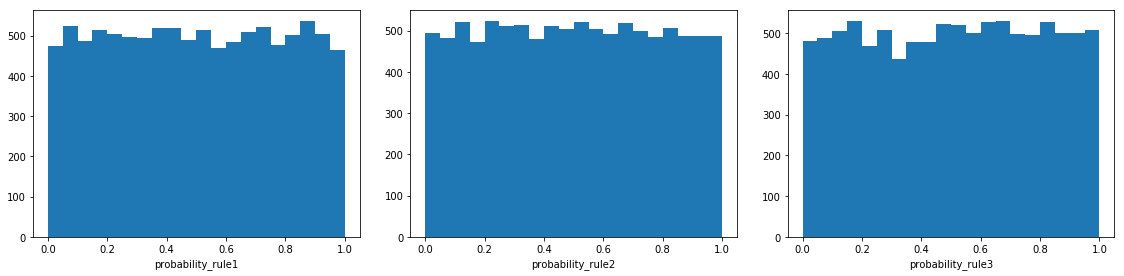

In [217]:
import matplotlib.pyplot as plt
res.plot_marginals()
plt.show()

In [218]:
probability_df = pd.read_csv('probability_df.csv', header=None)
probability_df.columns = ['probability_threshold','probability','row3','species']

In [219]:
distances_df = pd.read_csv('distances_df.csv', header=None)
distances_df.columns = ['distances']

In [220]:
probability_df['merge_col'] = range(len(probability_df))
distances_df['merge_col'] = range(len(distances_df))

In [221]:
bla = pd.merge(probability_df, distances_df, on='merge_col', how='inner' )
# bla['150-number'] = bla['merge_col'] % 150
# bla['iteration-number'] = np.floor(bla['merge_col'] / 150).astype(int)
# bla0 = bla[bla['distances']==0]
# bla1 = bla[bla['distances']==1]
# print(bla0['probablity'].mean())
# print(bla1['probablity'].mean())

In [222]:
bla['pandas_derived_species']= None
for index, row in bla.iterrows():
    if row['probability'] < row['probability_threshold'] and row['row3'] < 0.5:
        bla.loc[index,'pandas_derived_species'] = 'setosa'


In [223]:
bla['non_probabilistic_species']= None
for index, row in bla.iterrows():
    if row['row3'] < 0.5:
        bla.loc[index,'non_probabilistic_species'] = 'setosa'


In [224]:
bla = bla[['probability_threshold', 'probability',  'species', 'row3', 'merge_col',       'distances', 'pandas_derived_species', 'non_probabilistic_species']]

In [225]:
probability_rule1 = np.array(bla['probability_threshold'])
probability = list(bla['probability']) 
iris_mtx_simple_array = iris_df.as_matrix()
iris_mtx = np.ndarray((len(iris_mtx_simple_array),), dtype=object)
for row in range(len(iris_mtx_simple_array)):
    iris_mtx[row] = iris_mtx_simple_array[row]
    
iris_mtx = rule0(probability_rule1, probability, iris_mtx)

--------------------------------
0.06752469796174576
0.2916790579257784
[5.1 3.5 1.4 0.2 None]
--------------------------------


 c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:Method .as_matrix will be removed in a future version. Use .values instead.


ValueError: operands could not be broadcast together with shapes (14700,) (14700,) (150,) 

In [226]:
bla['vectorized_fctn_derived_species'] = list(map(itemgetter(4), iris_mtx))

ValueError: Length of values does not match length of index

In [229]:
print(bla.loc[bla['distances']==1,  'probability_threshold'].mean())
print(bla.loc[bla['distances']==0,  'probability_threshold'].mean())

0.5017994989726968
0.5000956699638017


In [243]:
bla[bla['distances']==1]

,probability_threshold,probability,species,row3,merge_col,distances,pandas_derived_species,non_probabilistic_species
2,0.436163,0.395965,setosa,0.2,2,1,setosa,setosa
3,0.878034,0.547677,setosa,0.2,3,1,setosa,setosa
4,0.996128,0.251953,setosa,0.2,4,1,setosa,setosa
5,0.593905,0.527072,setosa,0.4,5,1,setosa,setosa
8,0.572577,0.358036,setosa,0.2,8,1,setosa,setosa
10,0.503220,0.121288,setosa,0.2,10,1,setosa,setosa
12,0.699530,0.092324,setosa,0.1,12,1,setosa,setosa
13,0.831371,0.160258,setosa,0.1,13,1,setosa,setosa
14,0.951001,0.918341,setosa,0.2,14,1,setosa,setosa
15,0.531418,0.341574,setosa,0.4,15,1,setosa,setosa


In [247]:
bla2 =  bla[bla['species'] != bla['pandas_derived_species']]
bla2[bla2['species'].notnull()]

,probability_threshold,probability,species,row3,merge_col,distances,pandas_derived_species,non_probabilistic_species
152,0.128380,0.352012,setosa,0.2,152,1,None,setosa
153,0.294714,0.879376,setosa,0.2,153,1,None,setosa
158,0.579854,0.822469,setosa,0.2,158,1,None,setosa
162,0.079607,0.413204,setosa,0.1,162,1,None,setosa
164,0.005788,0.163813,setosa,0.2,164,1,None,setosa
165,0.118278,0.411346,setosa,0.4,165,1,None,setosa
176,0.233343,0.256582,setosa,0.4,176,1,None,setosa
179,0.246244,0.537712,setosa,0.2,179,1,None,setosa
185,0.224659,0.316731,setosa,0.2,185,1,None,setosa
199,0.391324,0.895791,setosa,0.2,199,1,None,setosa


In [244]:
bla.loc[152]

probability_threshold         0.12838
probability                  0.352012
species                        setosa
row3                              0.2
merge_col                         152
distances                           1
pandas_derived_species           None
non_probabilistic_species      setosa
Name: 152, dtype: object

In [30]:
bla.pivot(index='iteration-number', columns='150-number', values='probablity').to_csv('test2.csv')

KeyError: 'iteration-number'

In [157]:
context = elfi.ComputationContext(batch_size, seed='global', pool=None)
client = elfi.client.get_client()
compiled_net = client.compile(my_model.source_net, my_model.source_net.nodes())
loaded_net = client.load_data(compiled_net, context, batch_index=0)

executor = elfi.executor.Executor()
execution_order = executor.get_execution_order(loaded_net)
for node in execution_order:
    print(node + ': ' + str(loaded_net.node[node]))
    print()

_random_state: {'operation': <function get_np_random at 0x000001D36CCE6158>}

probability_rule1: {'operation': functools.partial(<function rvs_from_distribution at 0x000001D36D85D378>, distribution=<scipy.stats._continuous_distns.uniform_gen object at 0x000001D36CBF4550>, size=None)}

probability_rule2: {'operation': functools.partial(<function rvs_from_distribution at 0x000001D36D85D378>, distribution=<scipy.stats._continuous_distns.uniform_gen object at 0x000001D36CBF4550>, size=None)}

probability_rule3: {'operation': functools.partial(<function rvs_from_distribution at 0x000001D36D85D378>, distribution=<scipy.stats._continuous_distns.uniform_gen object at 0x000001D36CBF4550>, size=None)}

_S1_observed: {'operation': <function unchanged at 0x000001D372275620>}

_d_observed: {'operation': <function args_to_tuple at 0x000001D36CCDF7B8>}

Y: {'operation': <function simulator at 0x000001D3701BA1E0>}

S1: {'operation': <function unchanged at 0x000001D372275620>}

d: {'operation': functoo

In [155]:
loaded_net.node[node]

{'operation': <function elfi.loader.get_np_random()>}

##  Debug

In [103]:
context = elfi.ComputationContext(batch_size, seed='global', pool=None)
client = elfi.client.get_client()
compiled_net = client.compile(my_model.source_net, my_model.source_net.nodes())
loaded_net = client.load_data(compiled_net, context, batch_index=0)
# client.compute(loaded_net)

~~~~~~~~~~~~~~~~~~~~~~
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'vers

ValueError: In executing node 'd': Incompatible data shape for the distance node. Please check summary (XA) and observed (XB) output data dimensions. They have to be at most 2d. Especially ensure that summary nodes outputs 2d data even with batch_size=1. Original error message was: axis 1 is out of bounds for array of dimension 1.

In [109]:
# my_model.source_net.edges()
loaded_net.edges()

[('probability_rule1', 'Y'),
 ('_probability_rule1_3170', 'probability_rule1'),
 ('_probability_rule1_fb6e', 'probability_rule1'),
 ('probability_rule2', 'Y'),
 ('_probability_rule2_18db', 'probability_rule2'),
 ('_probability_rule2_1467', 'probability_rule2'),
 ('probability_rule3', 'Y'),
 ('_probability_rule3_55a3', 'probability_rule3'),
 ('_probability_rule3_1953', 'probability_rule3'),
 ('Y', 'S1'),
 ('_Y_55c5', 'Y'),
 ('S1', 'd'),
 ('_S1_a0bb', 'S1')]

In [117]:
executor = elfi.executor.Executor()
executor.get_execution_order(loaded_net)

In [107]:
loaded_net.node['d']['operation']

functools.partial(<function distance_as_discrepancy at 0x000001D36D85D2F0>, <function categorical_distance at 0x000001D3701BA510>)

executor._run(loaded_net.node['_S1_observed']['operation'], '_S1_observed', loaded_net) 
loaded_net.predecessors('_d_observed')

In [95]:
print('param: ' + str(loaded_net['_S1_observed']['_d_observed']['param']))
print('output: ' + str(loaded_net.node['_Y_observed']['output']))

param: 0


KeyError: 'output'

# Quickstart

In [15]:
def categorical_distance(u, v):

    u = np.asarray(u, dtype=object, order='c').squeeze()
    u = np.atleast_1d(u)
    v = np.asarray(v, dtype=object, order='c').squeeze()
    v = np.atleast_1d(v)

    u_v = np.equal(u, v).astype(int)
    dist = np.sum(u_v, axis=1)
    return dist

In [16]:
def categorical_distance(u, v):

    u = np.asarray(u, dtype=object, order='c').squeeze()
    u = np.atleast_1d(u)
    v = np.asarray(v, dtype=object, order='c').squeeze()
    v = np.atleast_1d(v)

    u_v = np.equal(u, v).astype(int)
#     dist = np.sum(u_v, axis=1)
    return u_v

In [25]:
import scipy.stats as ss
import numpy as np

def simulator(mu, sigma, batch_size=1, random_state=None):
    mu, sigma = np.atleast_1d(mu, sigma)
    return ss.norm.rvs(mu[:, None], sigma[:, None], size=(batch_size, 30), random_state=random_state)

def mean(y):
    return np.mean(y, axis=1)

def var(y):
    return np.var(y, axis=1)

In [26]:
# Set the generating parameters that we will try to infer
mean0 = 1
std0 = 3

# Generate some data (using a fixed seed here)
np.random.seed(20170525)
y0 = simulator(mean0, std0)
print(y0)

[[ 3.7990926   1.49411834  0.90999905  2.46088006 -0.10696721  0.80490023
   0.7413415  -5.07258261  0.89397268  3.55462229  0.45888389 -3.31930036
  -0.55378741  3.00865492  1.59394854 -3.37065996  5.03883749 -2.73279084
   6.10128027  5.09388631  1.90079255 -1.7161259   3.86821266  0.4963219
   1.64594033 -2.51620566 -0.83601666  2.68225112  2.75598375 -6.02538356]]


In [34]:
my_model2 = elfi.ElfiModel() 
mu = elfi.Prior('uniform', -2, 4, model=my_model2)
sigma = elfi.Prior('uniform', 1, 4, model=my_model2)

# Add the simulator node and observed data to the model
sim = elfi.Simulator(simulator, mu, sigma, observed=y0, model=my_model2)

# Add summary statistics to the model
S1 = elfi.Summary(mean, sim, model=my_model2)
S2 = elfi.Summary(var, sim, model=my_model2)

# Specify distance as euclidean between summary vectors (S1, S2) from simulated and
# observed data
d = elfi.Distance('euclidean', S1, S2, model=my_model2)

In [43]:
d.generate(batch_size=3).generate

array([7.15394098, 1.99679668, 4.57303275])

In [45]:
my_model2.generate(3, 'd')

{'d': array([ 6.76551038,  2.80448239, 10.76335052])}

In [50]:
context = elfi.ComputationContext(batch_size, seed='global', pool=None)
client = elfi.client.get_client()
compiled_net = client.compile(my_model2.source_net, my_model2.source_net.nodes())
loaded_net = client.load_data(compiled_net, context, batch_index=0)
client.compute(loaded_net)

{'mu': array([ 1.80819779, -1.46789664,  1.95924343, -0.10772634, -1.95528621,
        -0.69069391, -0.6149321 , -1.18287777, -0.14195998, -0.3133735 ,
        -0.48996594,  1.23227478,  1.56581074, -0.41889434,  0.00986654,
        -1.60330829, -1.58258473,  0.7280681 , -1.42423953, -0.40926901,
        -1.22342177, -1.01915393, -0.59826018, -1.33331951,  1.06788618,
        -0.81936668, -1.44812425,  1.40992791, -1.99213031,  1.20263931,
        -1.81229514, -1.63266769, -0.52419618, -1.57295071, -0.43461011,
        -1.20895179,  1.31508206, -0.34527051, -1.66134408,  1.51633637,
         0.40025782, -1.37816867,  1.00217864,  1.60737468, -0.51684878,
        -1.98964054,  0.65384502, -0.48914781,  1.02759077,  0.26775546,
         0.37120689, -1.39560902, -1.54532761,  0.65923219, -1.04987123,
        -1.90298346, -1.36009386,  0.07391548, -1.3318313 ,  0.71681013,
        -0.33052918, -0.72892015, -0.19994112, -1.00502723,  0.0371524 ,
         0.30465303, -1.09876165, -0.57588584

In [36]:
rej = elfi.Rejection(d, batch_size=10000, seed=30052017)
res = rej.sample(1000, threshold=.5)
print(res)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Method: Rejection
Number of samples: 1000
Number of simulations: 120000
Threshold: 0.492
Sample means: mu: 0.748, sigma: 3.1



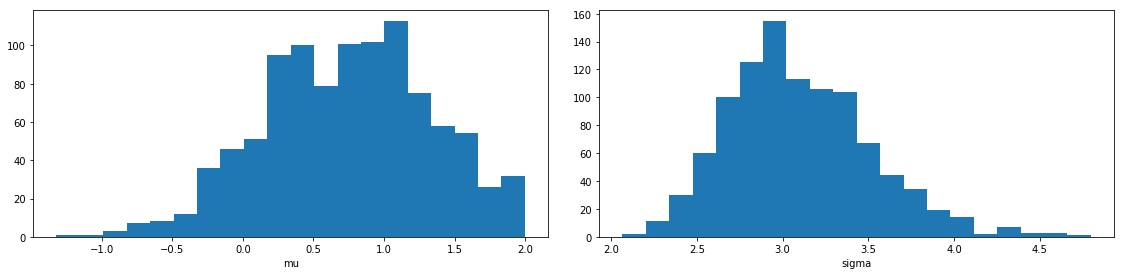

In [30]:
import matplotlib.pyplot as plt
res.plot_marginals()
plt.show()

# ELFI tutorial

In [198]:
import time

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter

%matplotlib inline
%precision 2

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20170530  # this will be separately given to ELFI
np.random.seed(seed)

In [226]:
def MA2(t1, t2, n_obs=100, batch_size=1, random_state=None):
    # Make inputs 2d arrays for numpy broadcasting with w
    t1 = np.asanyarray(t1).reshape((-1, 1))
    t2 = np.asanyarray(t2).reshape((-1, 1))
    random_state = random_state or np.random

    w = random_state.randn(batch_size, n_obs+2)  # i.i.d. sequence ~ N(0,1)
    x = w[:, 2:] + t1*w[:, 1:-1] + t2*w[:, :-2]
    return x

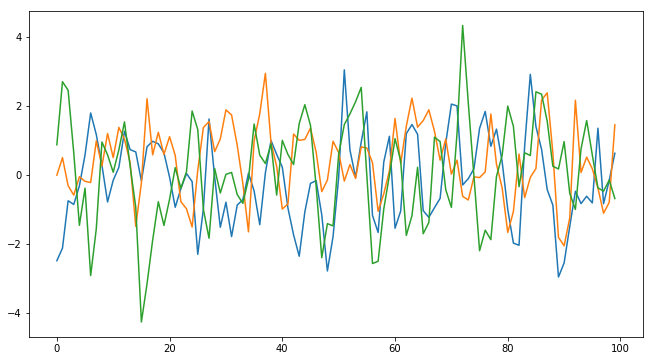

In [227]:
# true parameters
t1_true = 0.6
t2_true = 0.2

y_obs = MA2(t1_true, t2_true)

# Plot the observed sequence
plt.figure(figsize=(11, 6));
plt.plot(y_obs.ravel());

# To illustrate the stochasticity, let's plot a couple of more observations with the same true parameters:
plt.plot(MA2(t1_true, t2_true).ravel());
plt.plot(MA2(t1_true, t2_true).ravel());

In [228]:
my_model3 = elfi.ElfiModel() 

# a node is defined by giving a distribution from scipy.stats together with any arguments (here 0 and 2)
t1 = elfi.Prior(scipy.stats.uniform, 0, 2, model=my_model3)

# ELFI also supports giving the scipy.stats distributions as strings
t2 = elfi.Prior('uniform', 0, 2, model=my_model3)

In [229]:
Y = elfi.Simulator(MA2, t1, t2, observed=y_obs, model=my_model3)

In [230]:
def autocov(x, lag=1):
    C = np.mean(x[:,lag:] * x[:,:-lag], axis=1)
    return C

In [232]:
S1 = elfi.Summary(autocov, Y, model=my_model3)
S2 = elfi.Summary(autocov, Y, 2, model=my_model3)  # the optional keyword lag is given the value 2

# Finish the model with the final node that calculates the squared distance (S1_sim-S1_obs)**2 + (S2_sim-S2_obs)**2
d = elfi.Distance('euclidean', S1, S2, model=my_model3)

In [233]:
# define prior for t1 as in Marin et al., 2012 with t1 in range [-b, b]
class CustomPrior_t1(elfi.Distribution):
    def rvs(b, size=1, random_state=None):
        u = scipy.stats.uniform.rvs(loc=0, scale=1, size=size, random_state=random_state)
        t1 = np.where(u<0.5, np.sqrt(2.*u)*b-b, -np.sqrt(2.*(1.-u))*b+b)
        return t1

# define prior for t2 conditionally on t1 as in Marin et al., 2012, in range [-a, a]
class CustomPrior_t2(elfi.Distribution):
    def rvs(t1, a, size=1, random_state=None):
        locs = np.maximum(-a-t1, t1-a)
        scales = a - locs
        t2 = scipy.stats.uniform.rvs(loc=locs, scale=scales, size=size, random_state=random_state)
        return t2

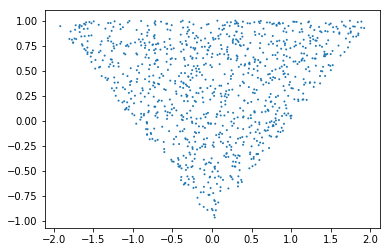

In [234]:
t1_1000 = CustomPrior_t1.rvs(2, 1000)
t2_1000 = CustomPrior_t2.rvs(t1_1000, 1, 1000)
plt.scatter(t1_1000, t2_1000, s=4, edgecolor='none');
# plt.plot([0, 2, -2, 0], [-1, 1, 1, -1], 'b')  # outlines of the triangle

In [235]:
t1.become(elfi.Prior(CustomPrior_t1, 2, model=my_model3))
t2.become(elfi.Prior(CustomPrior_t2, t1, 1, model=my_model3))

In [236]:
rej = elfi.Rejection(d, batch_size=10000, seed=seed)

AttributeError: 'Distance' object has no attribute 'observed'

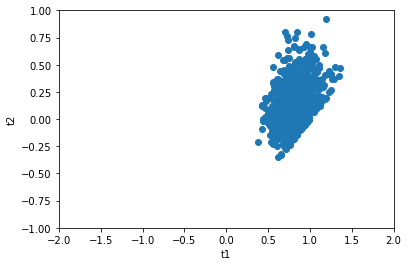

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Wall time: 5.57 s


In [238]:
N = 1000

vis = dict(xlim=[-2,2], ylim=[-1,1])

# You can give the sample method a `vis` keyword to see an animation how the prior transforms towards the
# posterior with a decreasing threshold.
%time result = rej.sample(N, quantile=0.01, vis=vis)

In [239]:
result.samples['t1'].mean()

0.8102187198220465

In [212]:
result.summary()

Method: Rejection
Number of samples: 1000
Number of simulations: 100000
Threshold: 0.117
Sample means: t1: 0.556, t2: 0.219


In [242]:
elfi.set_client('multiprocessing')

In [241]:
elfi.examples

AttributeError: module 'elfi' has no attribute 'examples'